In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
dataset=pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/synthetic_placement_data.csv")

In [52]:
dataset.head(3)

,cgpa,score,placed
0,6.50,7.79,0
1,8.80,7.14,1
2,7.93,6.24,1


In [86]:
dataset.count()

cgpa      500
score     500
placed    500
dtype: int64

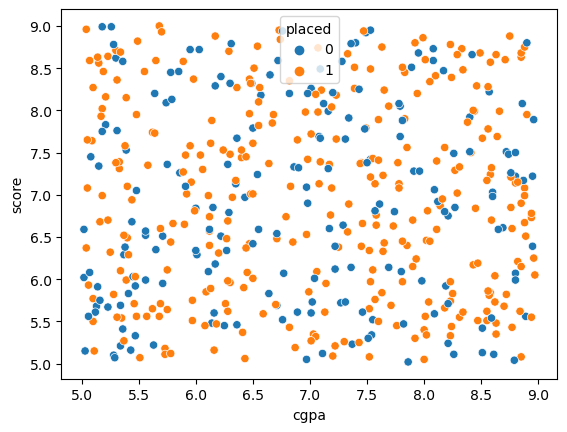

In [53]:
sns.scatterplot(x="cgpa",y="score",data=dataset,hue="placed")
plt.show()

In [54]:
x=dataset.iloc[:,:-1]
y=dataset["placed"]

In [55]:
x.columns

Index(['cgpa', 'score'], dtype='object')

In [56]:
from sklearn.model_selection import train_test_split

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)

In [180]:
x_train_scaled[50:55]

array([[ 1.11130044,  1.57706243],
       [ 0.04148735,  0.15886075],
       [-1.07111827,  1.32887714],
       [ 1.35949708, -1.08206573],
       [-0.40355489,  1.16932945]])

In [181]:
x_test_scaled=sc.transform(x_test)

In [182]:
x_test_scaled[50:55]

array([[-0.18103377,  1.24023953],
       [ 0.52076362, -0.55024009],
       [ 1.43652363,  1.46183355],
       [ 0.68337521,  1.32887714],
       [-1.45625098,  0.38931852]])

In [183]:
x_train.count()

cgpa     400
score    400
dtype: int64

In [184]:
x_test.count()

cgpa     100
score    100
dtype: int64

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [187]:
lr.score(x_test_scaled,y_test)*100

69.0

In [188]:
x_test[90:95]

,cgpa,score
333,5.46,5.71
335,5.16,6.68
128,5.03,5.15
257,7.78,7.13
147,7.01,7.72


In [189]:
y_test[90:95]

333    1
335    1
128    0
257    1
147    1
Name: placed, dtype: int64

In [190]:
lr.predict([[5.46,5.71]])

array([1])

In [191]:
lr.predict([[5.03,5.15]])

array([1])

In [192]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [193]:
cf=confusion_matrix(y_test,lr.predict(x_test_scaled))
cf

array([[ 0, 31],
       [ 0, 69]])

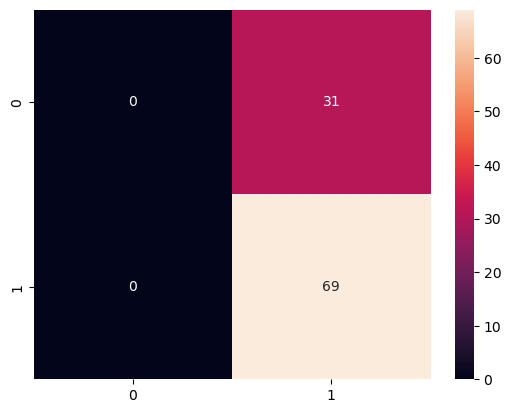

In [194]:
sns.heatmap(cf,annot=True)
plt.show()

In [126]:
precision_score(y_test,lr.predict(x_test_scaled))*100

69.0

In [127]:
recall_score(y_test,lr.predict(x_test_scaled))*100

100.0

In [128]:
f1_score(y_test,lr.predict(x_test_scaled))*100

81.65680473372781